# auto feature outbrain

## 1. Load Datasets

In [1]:
import pandas as pd
from utils import Timer
from pathlib import Path


file_list = {
    'clicks': "clicks_train.csv",
    'documents_categories': "documents_categories.csv",
    'documents_entities': "documents_entities.csv",
    'documents_meta': "documents_meta.csv",
    'documents_topics': "documents_topics.csv",
    'events': "events.csv",
    'page_views': "page_views_sample.csv",
    'promoted_content': "promoted_content.csv"
}

/home/vmagent/app/recdp


[6, 4, 15, 3, 2, 12, 1, 7, 9, 5, 0, 8, 10, 11, 13, 14, 16, 17]


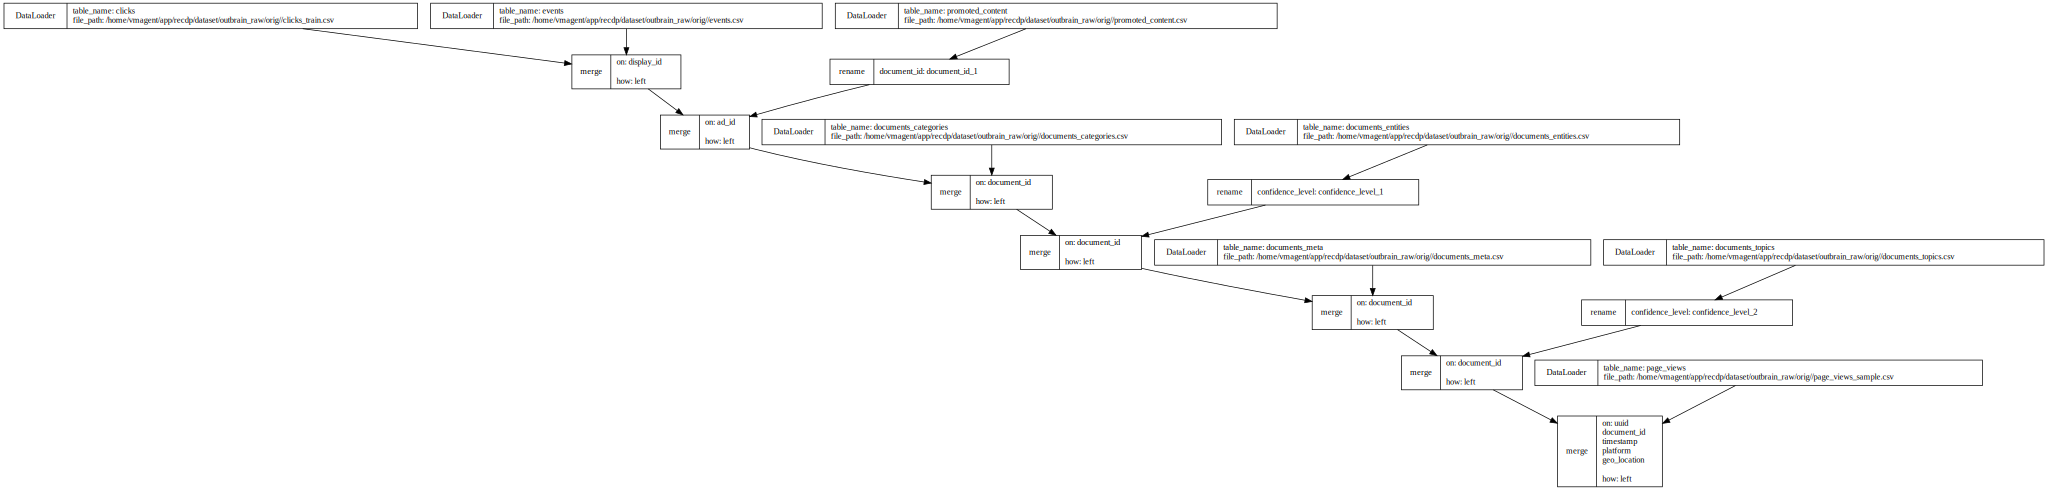

In [2]:
import os, sys
pathlib = str(Path(os.path.abspath('')).parent.parent.parent.resolve())
dir_path = f"{pathlib}/dataset/outbrain_raw/orig/"
sys.path.append(pathlib)
print(pathlib)

from pyrecdp.autofe import RelationalBuilder
train_data = dict((f_name, f"{dir_path}/{f_path}") for f_name, f_path in file_list.items())
pipeline = RelationalBuilder(dataset=train_data, label="clicked")
print(pipeline.to_chain())
pipeline.plot()

In [4]:
df = pipeline.fit_transform('spark')

Will assign 48 cores and 308503 M memory for spark
per core memory size is 6.277 GB and shuffle_disk maximum capacity is 8589934592.000 GB
append DataLoader to spark pipeline


output schema is DataFrame[uuid: string, document_id: int, timestamp: int, platform: int, geo_location: string, traffic_source: int]
append DataLoader to spark pipeline


output schema is DataFrame[document_id: int, topic_id: int, confidence_level: double]
append rename to spark pipeline
output schema is DataFrame[document_id: int, topic_id: int, confidence_level_2: double]
append DataLoader to spark pipeline
output schema is DataFrame[document_id: int, source_id: int, publisher_id: int, publish_time: timestamp]
append DataLoader to spark pipeline
output schema is DataFrame[document_id: int, entity_id: string, confidence_level: double]
append rename to spark pipeline
output schema is DataFrame[document_id: int, entity_id: string, confidence_level_1: double]
append DataLoader to spark pipeline
output schema is DataFrame[document_id: int, category_id: int, confidence_level: double]
append DataLoader to spark pipeline
output schema is DataFrame[ad_id: int, document_id: int, campaign_id: int, advertiser_id: int]
append rename to spark pipeline
output schema is DataFrame[ad_id: int, document_id_1: int, campaign_id: int, advertiser_id: int]
append DataLoader 

output schema is DataFrame[display_id: int, uuid: string, document_id: int, timestamp: int, platform: string, geo_location: string]
append DataLoader to spark pipeline


output schema is DataFrame[display_id: int, ad_id: int, clicked: int]
append merge to spark pipeline
output schema is DataFrame[display_id: int, ad_id: int, clicked: int, uuid: string, document_id: int, timestamp: int, platform: string, geo_location: string]
append merge to spark pipeline
output schema is DataFrame[ad_id: int, display_id: int, clicked: int, uuid: string, document_id: int, timestamp: int, platform: string, geo_location: string, document_id_1: int, campaign_id: int, advertiser_id: int]
append merge to spark pipeline
output schema is DataFrame[document_id: int, ad_id: int, display_id: int, clicked: int, uuid: string, timestamp: int, platform: string, geo_location: string, document_id_1: int, campaign_id: int, advertiser_id: int, category_id: int, confidence_level: double]
append merge to spark pipeline
output schema is DataFrame[document_id: int, ad_id: int, display_id: int, clicked: int, uuid: string, timestamp: int, platform: string, geo_location: string, document_id_1:

execute with spark took 240.00823776517063 sec


In [12]:
from pyspark.sql import *
spark = SparkSession.builder.master(f'local[*]')\
                .getOrCreate()
df = spark.read.parquet("file:///tmp/materialized_tmp-8bb4f61e-b830-11ed-a753-3cfdfeba0c35-0")
df.count()

1938307188

In [10]:
spark.stop()